# QNM Selecting Demo

This workbook demonstrates the process of selecting QNMs for a model based on their significance.

In [1]:
import numpy as np
import likelihood_funcs
import qnm_selecting_funcs as qsf
import utils
import CCE
import matplotlib.pyplot as plt

## Fixed $t_0$ QNM selection

First, let's set up a model with all QNMs up to $l_{\rm max} = 4$ and $n_{\rm max} = 4$.

In [2]:
sim = CCE.SXS_CCE("0001")
t0 = 20

l_max = 4
n_max = 4

sigma = 1e-4

qnm_list, spherical_modes, data_times, data, Mf_0, chif_mag_0, C_0, true_params = (
    utils.get_params(sim, t0, T=100, l_max=l_max, n_max=n_max)
)

Next, we find the initial mean vector and covariance. 

In [3]:
fisher_matrix = likelihood_funcs.get_fisher_matrix(
    qnm_list, spherical_modes, t0, data_times, Mf_0, chif_mag_0, inv_cov=sigma
)
b_vec = likelihood_funcs.get_b_vector(
    qnm_list, spherical_modes, t0, data_times, data, Mf_0, chif_mag_0, inv_cov=sigma
)
mean_vector = np.linalg.solve(fisher_matrix, b_vec)
covariance_matrix = np.linalg.inv(fisher_matrix)

Precomputation time:  0.49876832962036133
Fisher matrix computation time:  7.502432346343994


Now we run the recursive qnm finder function, which marginalises over each parameter, determines the QNM with the lowest signifiance and removes it from the model. Then it repeats the process with the reduced model until every QNM is above the threshold significance. 

In [4]:
qnm_list_cleaned = qsf.recursive_qnm_finder(
    qnm_list, b_vec, fisher_matrix, threshold_sig=np.log(0.9)
)

(2, -1, 0, -1) removed with significance -26.10431618368733
(2, 1, 0, 1) removed with significance -25.741893199054367
(4, -1, 0, 1) removed with significance -25.27872207434635
(4, 1, 0, 1) removed with significance -25.058487792953628
(4, 1, 0, -1) removed with significance -24.981501639084872
(4, -1, 0, -1) removed with significance -24.858031323320223
(2, -1, 0, 1) removed with significance -24.839926491727685
(4, 3, 0, -1) removed with significance -24.703243714992162
(2, 1, 0, -1) removed with significance -24.468598552681378
(4, -3, 0, 1) removed with significance -24.46653321210493
(4, -3, 0, -1) removed with significance -24.45514282919073
(4, 3, 0, 1) removed with significance -24.307456381024018
(4, -1, 1, 1) removed with significance -24.248730730039007
(4, 1, 1, 1) removed with significance -23.962226020656676
(4, 1, 1, -1) removed with significance -23.9548620301405
(4, -1, 2, 1) removed with significance -23.794164516998507
(4, -1, 1, -1) removed with significance -23.80

We now have a list of QNMs in the model which fall above the significance threshold. 

In [5]:
print("**** Significant QNMs in the model, ranked by significance ****")
utils.get_tidy_list(
    qnm_list_cleaned,
    spherical_modes,
    t0,
    data_times,
    data,
    Mf_0,
    chif_mag_0,
    inv_cov=sigma,
)

**** Significant QNMs in the model, ranked by significance ****


Precomputation time:  0.08284974098205566
Fisher matrix computation time:  0.1938624382019043
(2, -2, 0, -1) -0.0
(2, -2, 1, -1) -0.0
(2, 2, 0, 1) -0.0
(2, 2, 1, 1) -0.0
(3, -2, 0, -1) -0.0
(3, 2, 0, 1) -0.0
(4, 4, 0, 1) -3.686658066259069e-255
(4, -4, 0, -1) -3.6866587842214986e-255
(2, 0, 0, 1) -2.2302615731131735e-125
(2, 0, 0, -1) -8.126575461973024e-53
(3, -2, 1, -1) -8.62323855052984e-12
(3, 2, 1, 1) -8.623336810582736e-12
(4, -2, 0, -1) -9.095306743424816e-09
(4, 2, 0, 1) -9.095318245898449e-09
(4, 4, 1, 1) -3.0564762836470386e-08
(4, -4, 1, -1) -3.056476310864866e-08
(2, -2, 3, -1) -0.000429760497249302
(2, 2, 3, 1) -0.0004297611250672988
(4, -4, 2, -1) -0.001162818894896389
(4, 4, 2, 1) -0.0011628189057184247
(3, 0, 3, -1) -0.0016568240913972531
(3, 0, 4, -1) -0.003071198755044528
(2, 0, 2, 1) -0.0037183903753426817
(2, 0, 3, 1) -0.0046074384968634394
(3, 0, 2, 1) -0.005113273651473467
(2, 0, 2, -1) -0.005178648014385649
(3, 0, 3, 1) -0.00564202395902678
(2, 0, 3, -1) -0.00910

In principle, we can do this with a QNM model containing linear and higher-order modes (not demonstrated here). 

## Varying $t_0$ 

We can do the above at a series of $t_0$ values, removing QNMs that fall below the threshold at each timestep and taking the new model forward to the next start time. 

In [6]:
t0_list = np.arange(0, 100, 1)

qnm_list_timeseries = qsf.get_qnm_timeseries_drop_modes(
    qnm_list,
    spherical_modes,
    t0_list,
    data_times,
    data,
    Mf_0,
    chif_mag_0,
    inv_cov=sigma,
)

Precomputation time:  0.2585468292236328
Fisher matrix computation time:  7.35345196723938
t0 = 0
(420, 420)
(420,)
(4, -3, 0, -1) removed with significance -26.606934703316835
(4, 3, 0, 1) removed with significance -26.187965241714323
(4, -1, 0, -1) removed with significance -25.20485709887111
(4, 1, 0, 1) removed with significance -25.11578332235603
(4, 3, 0, -1) removed with significance -24.877113132319174
(4, -1, 0, 1) removed with significance -24.867880392073005
(4, 1, 0, -1) removed with significance -24.75880236232708
(4, -3, 0, 1) removed with significance -24.561811037560677
(2, -1, 0, 1) removed with significance -24.432911795946637
(2, 1, 0, -1) removed with significance -24.098380732172192
(4, -1, 1, 1) removed with significance -24.000902936791153
(4, 3, 1, -1) removed with significance -23.726106455183025
(4, -1, 2, 1) removed with significance -23.71869165316808
(4, -1, 1, -1) removed with significance -23.752309421281467
(4, 1, 1, -1) removed with significance -23.672

We now have a method to determine what QNMs are present at a given start time, based on the model at the previous step. This gives us, for example, a way to examine overtone decay at early start times. 

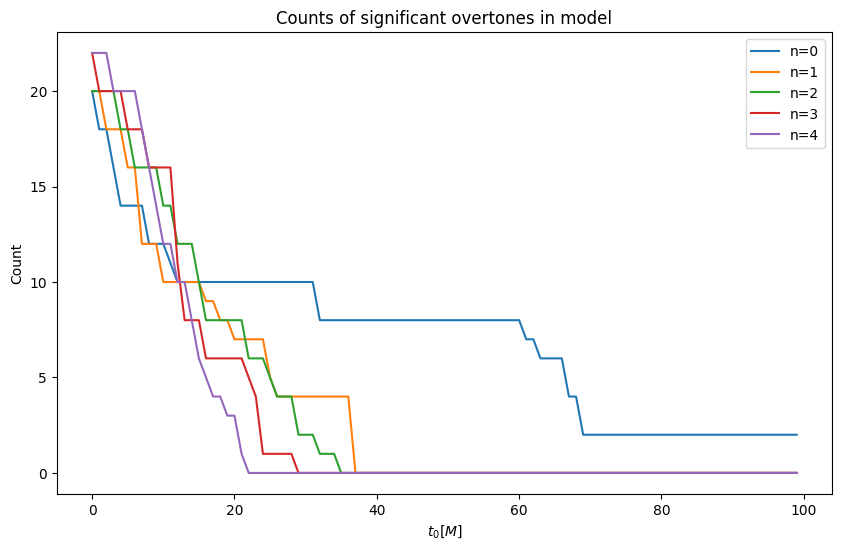

In [7]:
n_counts_over_time = {n: [] for n in range(n_max + 1)}

for time, qnm_list in zip(t0_list, qnm_list_timeseries):
    n_counts = {n: 0 for n in range(n_max + 1)}
    for qnm in qnm_list:
        n_counts[qnm[2]] += 1

    for n in range(n_max + 1):
        n_counts_over_time[n].append(n_counts[n])

plt.figure(figsize=(10, 6))
for n, counts in n_counts_over_time.items():
    plt.plot(t0_list, counts, label=f"n={n}")

plt.xlabel(r"$t_0 [M]$")
plt.ylabel("Count")
plt.title("Counts of significant overtones in model")
plt.legend()
plt.show()